# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


In [3]:
cities

['choix',
 'dakhla',
 'skerries',
 'san antonio de pale',
 'port-aux-francais',
 'fedorovka',
 'chibougamau',
 'adamstown',
 'west island',
 'atafu village',
 'hawaiian paradise park',
 'port hedland',
 'ilulissat',
 'avarua',
 'malvan',
 'edinburgh of the seven seas',
 'punta arenas',
 'puerto natales',
 'lebu',
 'lihue',
 'fort bragg',
 'ondjiva',
 'nadym',
 'isafjordur',
 'port elizabeth',
 'lekki',
 'kodiak',
 "huai'an",
 'alaghsas',
 'blackmans bay',
 'thunder bay',
 'puerto ayora',
 'puerto san carlos',
 'nolinsk',
 'saint-philippe',
 'lata',
 'thompson',
 'bosansko grahovo',
 'bilibino',
 'tiksi',
 'yellowknife',
 'kulhudhuffushi',
 'antsiranana',
 'grytviken',
 'bredasdorp',
 'karasburg',
 'udachny',
 'pangoa',
 'port lincoln',
 'tsiombe',
 'la sarre',
 "arkhangel'sk",
 'port augusta',
 'attalla',
 'tobruk',
 'petropavlovsk-kamchatsky',
 'georgetown',
 'afaahiti',
 'taiohae',
 'heilbron',
 'ouahigouya',
 'albany',
 'ushuaia',
 'haiku-pauwela',
 'bethel',
 'mvurwi',
 'big spring

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | choix
Processing Record 2 of Set 1 | dakhla
Processing Record 3 of Set 1 | skerries
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | fedorovka
Processing Record 7 of Set 1 | chibougamau
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | port hedland
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | malvan
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,choix,26.7092,-108.3219,23.60,87,89,3.56,MX,1691035175
1,dakhla,23.6848,-15.9580,19.95,88,19,9.85,EH,1691035175
2,skerries,53.5828,-6.1083,13.72,90,97,8.09,IE,1691035175
3,san antonio de pale,-1.4014,5.6325,22.06,78,91,3.25,GQ,1691035175
4,port-aux-francais,-49.3500,70.2167,2.82,91,100,13.79,TF,1691034895


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,choix,26.7092,-108.3219,23.60,87,89,3.56,MX,1691035175
1,dakhla,23.6848,-15.9580,19.95,88,19,9.85,EH,1691035175
2,skerries,53.5828,-6.1083,13.72,90,97,8.09,IE,1691035175
3,san antonio de pale,-1.4014,5.6325,22.06,78,91,3.25,GQ,1691035175
4,port-aux-francais,-49.3500,70.2167,2.82,91,100,13.79,TF,1691034895


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

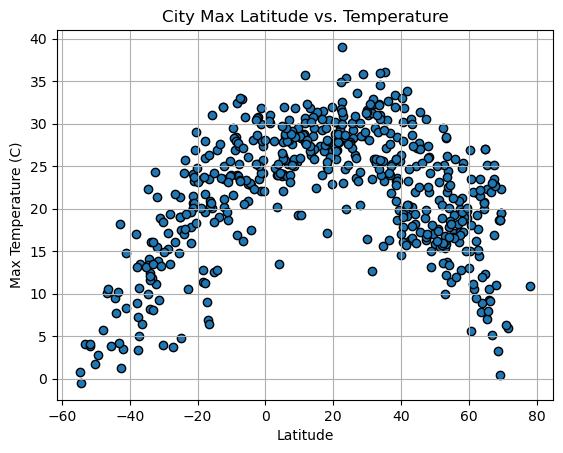

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

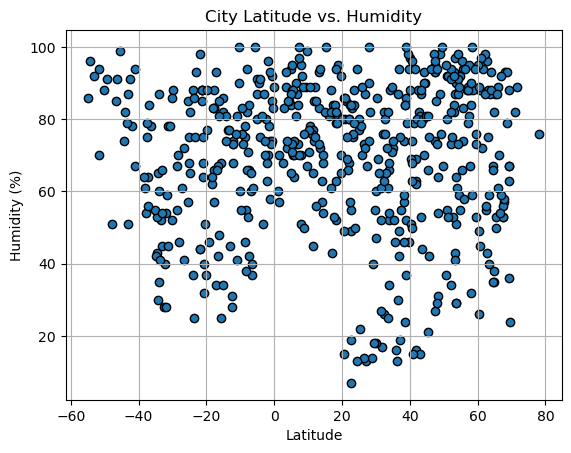

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

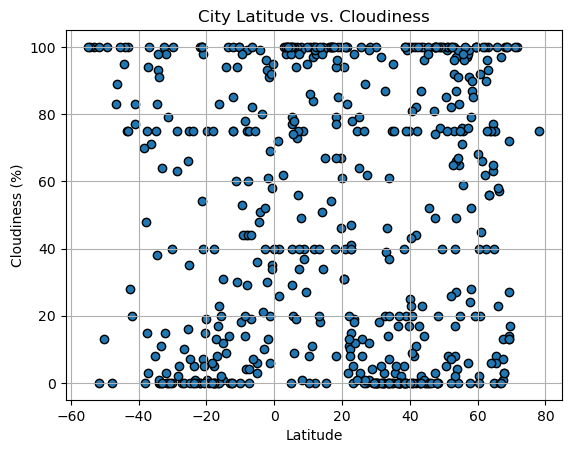

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

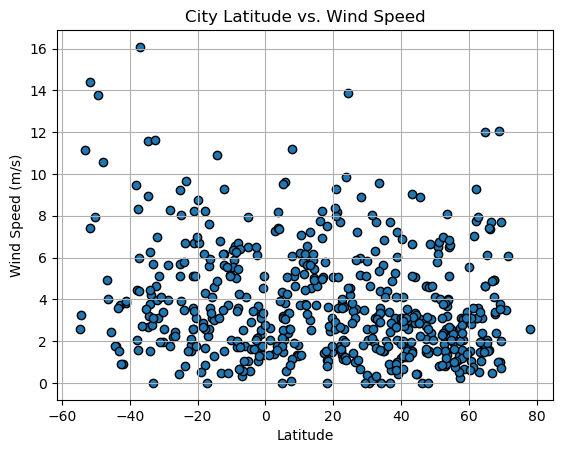

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

regress_values

City_ID
0      22.200230
1      22.095715
2      23.128906
3      21.228806
4      19.571837
         ...    
541    21.908318
542    22.451229
543    19.982905
544    22.057854
545    23.670497
Name: Lat, Length: 546, dtype: float64

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,choix,26.7092,-108.3219,23.60,87,89,3.56,MX,1691035175
1,dakhla,23.6848,-15.9580,19.95,88,19,9.85,EH,1691035175
2,skerries,53.5828,-6.1083,13.72,90,97,8.09,IE,1691035175
5,fedorovka,53.6314,62.7078,21.95,64,27,3.22,KZ,1691035175
6,chibougamau,49.9168,-74.3659,15.79,67,100,4.12,CA,1691034440


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,san antonio de pale,-1.4014,5.6325,22.06,78,91,3.25,GQ,1691035175
4,port-aux-francais,-49.3500,70.2167,2.82,91,100,13.79,TF,1691034895
7,adamstown,-25.0660,-130.1015,21.34,75,35,9.22,PN,1691035176
8,west island,-12.1568,96.8225,24.99,73,75,9.26,CC,1691034910
9,atafu village,-8.5421,-172.5159,28.42,75,78,5.04,TK,1691035040


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      25.555634
1      26.175973
2      20.043549
5      20.033581
6      20.795488
         ...    
539    21.164217
541    27.288252
542    24.065848
544    26.400693
545    16.828980
Name: Lat, Length: 369, dtype: float64

y= -0.21x +31.03


The r-value is: 0.06755316353844144


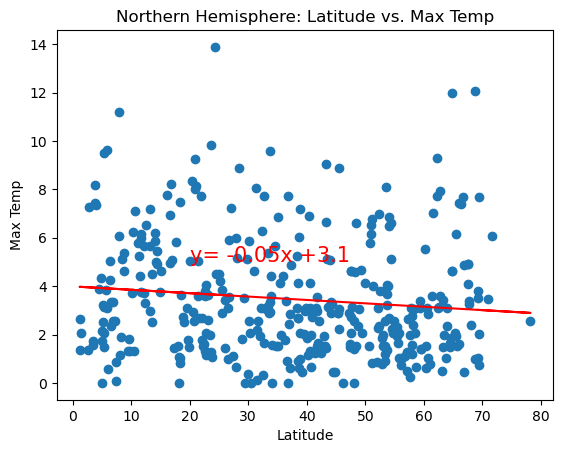

In [33]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [34]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
3      27.705007
4       5.696287
7      16.842801
8      22.768208
9      24.427379
         ...    
530    17.492754
535    18.831539
536    11.303832
540    13.183005
543    11.156307
Name: Lat, Length: 177, dtype: float64

y= 0.46x +28.35


The r-value is: 0.6347640398026647


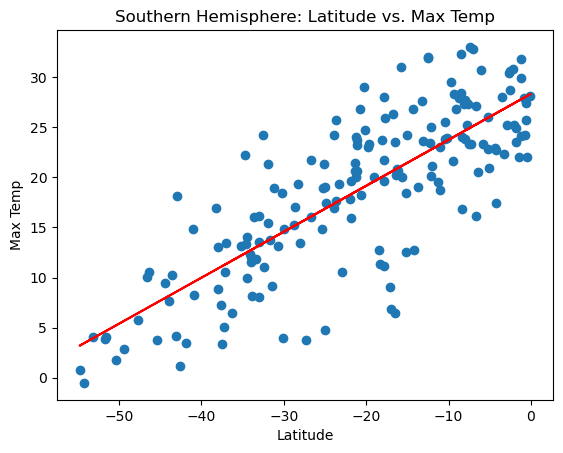

In [35]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 


During this time of year (August), the relationship between latitude and temperature in the northern hemisphere is negative.  The latitude increases and the temperature decreases.  In the southern hemisphere, there is a positive slope.  The latitude increases and the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      70.709781
1      70.867682
2      69.306736
5      69.304199
6      69.498134
         ...    
539    69.591990
541    71.150801
542    70.330571
544    70.924882
545    68.488500
Name: Lat, Length: 369, dtype: float64

y= -0.05x +72.1


The r-value is: 0.0022379199626529917


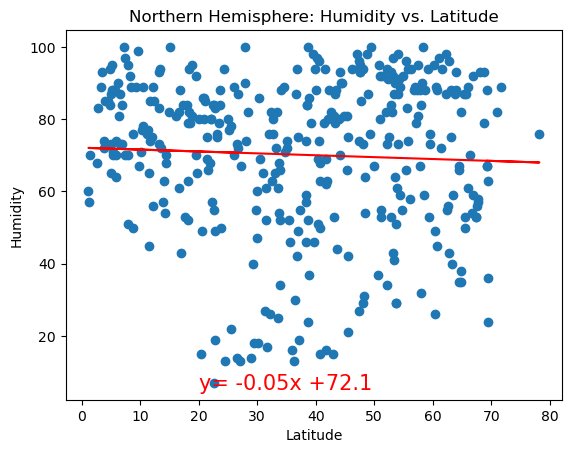

In [37]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [38]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
3      68.812861
4      67.508647
7      68.169178
8      68.520311
9      68.618632
         ...    
530    68.207693
535    68.287028
536    67.840944
540    67.952302
543    67.832202
Name: Lat, Length: 177, dtype: float64

y= 0.03x +68.85


The r-value is: 0.0004090240466902305


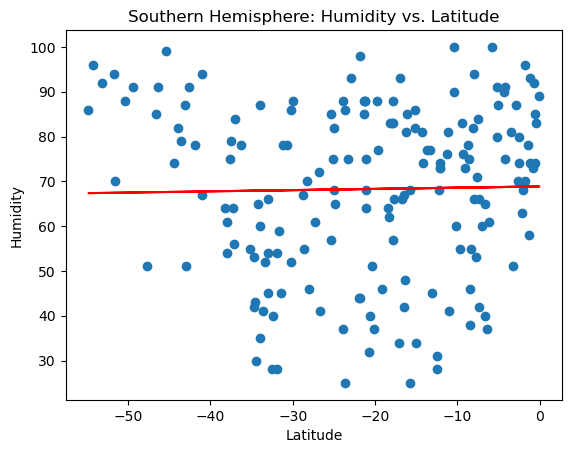

In [39]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

In the relationship between Humidity and Latitude, the northern hemisphere has a very slight negative slope with the humidity decreasing as the latitude increases.  The Southern hemisphere has a slight positive slope with the humidity increasing with the increase in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      52.396284
1      52.753312
2      49.223876
5      49.218139
6      49.656645
         ...    
539    49.868862
541    53.393470
542    51.538857
544    52.882647
545    47.373773
Name: Lat, Length: 369, dtype: float64

y= -0.12x +55.55


The r-value is: 0.003400939405036386


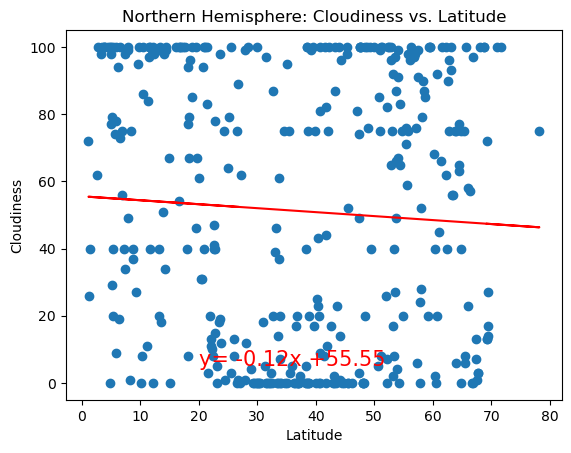

In [41]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")

plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [42]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
3      37.703615
4      51.772570
7      44.647221
8      40.859437
9      39.798821
         ...    
530    44.231742
535    43.375932
536    48.187977
540    46.986726
543    48.282282
Name: Lat, Length: 177, dtype: float64

y= -0.29x +37.29


The r-value is: 0.011463261158509753


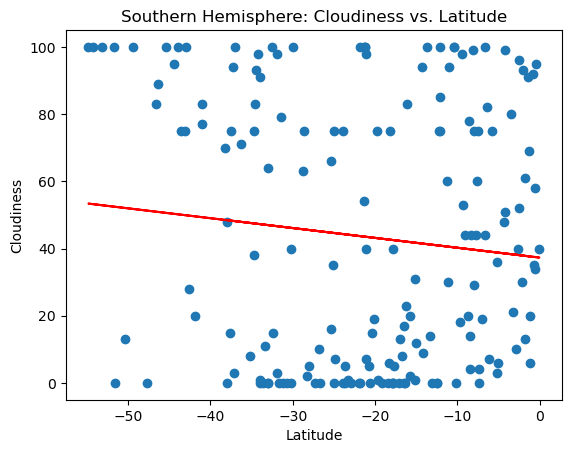

In [43]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")

plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

In both the northern and southern hemisphere, there was a negative slope in the relationship between Cloudiness and Latitude.  This means as the latitude increases, the cloudiness decreases.

### Wind Speed vs. Latitude Linear Regression Plot

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      3.615937
1      3.658301
2      3.239500
5      3.238820
6      3.290852
         ...   
539    3.316034
541    3.734262
542    3.514195
544    3.673648
545    3.019968
Name: Lat, Length: 369, dtype: float64

y= -0.01x +3.99


The r-value is: 0.01291357691487934


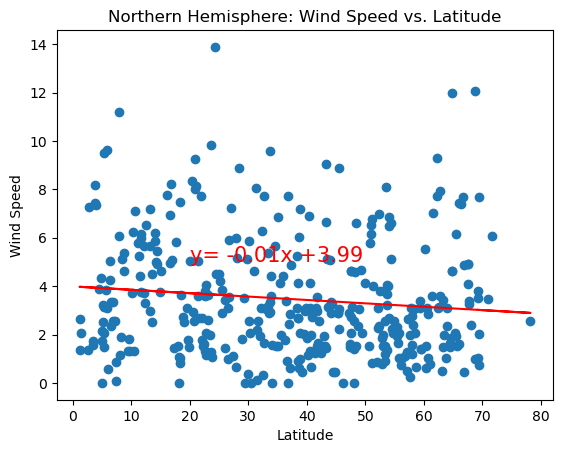

In [45]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")

plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [46]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
3      3.170139
4      5.739151
7      4.438052
8      3.746397
9      3.552727
         ...   
530    4.362185
535    4.205913
536    5.084599
540    4.865249
543    5.101819
Name: Lat, Length: 177, dtype: float64

y= -0.05x +3.1


The r-value is: 0.06755316353844144


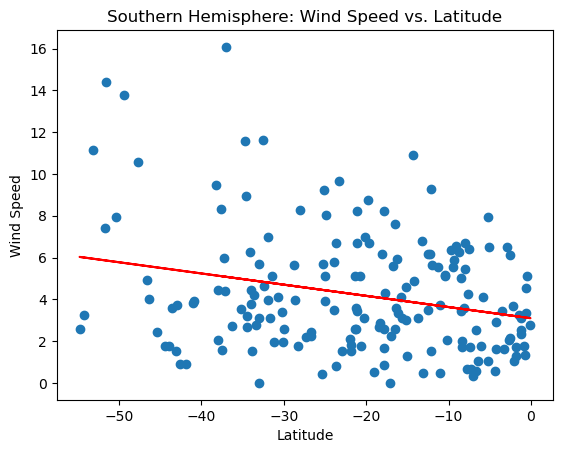

In [31]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")

plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

During this time of year (August), the northern hemisphere has a very slight negative slope which indicates the wind speeds decrease as the latitude increases.  At the same time, the southern hemispher has a positive slope of an increasing wind speed as the latitude also increases.